# **Data Visualization**
---

## Objectives

* Answer business requirement 1: 
    * The client is interested in visually differentiating animal species using image data.


## Inputs

* inputs/datasets/animals/image/train/
* inputs/datasets/animals/image/test/
* inputs/datasets/animals/image/validation/

## Outputs

* Image shape embeddings pickle file.
* Plots showing mean and variability of images per species.
* Plots highlighting differences between average species images.
* Code to generate an image montage, which can later be reused in the Streamlit dashboard.


## Additional Comments | Insights | Conclusions

N/A for now

---

## Set Data Directory
---

Import libraries

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
sns.set_style("white")
from matplotlib.image import imread

Set working directory

In [3]:
cwd = os.getcwd()
os.chdir('/workspaces/Animal_detection_camera')
print("You set a new current directory")

work_dir = os.getcwd()
work_dir

You set a new current directory


'/workspaces/Animal_detection_camera'

### Set input directories
* Set train, test, and validation paths.

In [4]:
my_data_dir = 'inputs/datasets/animals/image'
train_path = my_data_dir + '/train'
val_path = my_data_dir + '/validation'
test_path = my_data_dir + '/test'

### Set output directory

In [5]:
version = 'v1'
file_path = f'outputs/{version}'

if 'outputs' in os.listdir(work_dir) and version in os.listdir(work_dir + '/outputs'):
    print('Old version is already available, create a new version.')
    pass
else:
    os.makedirs(name=file_path)


### Set Species labels

In [6]:
labels = os.listdir(train_path)
print('Labels for the images are:', labels)

Labels for the images are: ['lemur', 'snake', 'elephant', 'frog', 'chimpanzee', 'chinchilla', 'flamingo', 'mongoose', 'ostrich', 'ferret', 'camel', 'bee', 'mole', 'penguin', 'leopard', 'hawk', 'hedgehog', 'walrus', 'falcon', 'grasshopper', 'beaver', 'antelope', 'giraffe', 'duck', 'lizard', 'crab', 'goose', 'gorilla', 'jaguar', 'sheep', 'lynx', 'butterfly', 'panda', 'goat', 'deer', 'peacock', 'dog', 'whale', 'kangaroo', 'seal', 'cheetah', 'cow', 'iguana', 'hippopotamus', 'fox', 'cat', 'donkey', 'raccoon', 'blackbird', 'buffalo', 'koala', 'crocodile', 'dolphin', 'hyena', 'porcupine', 'bear', 'squid', 'spider', 'eagle', 'bison', 'owl', 'otter', 'snail', 'wolf']


---

# Data Visualization of Image Data
---

## Image shape

Compute average images images size on train set.

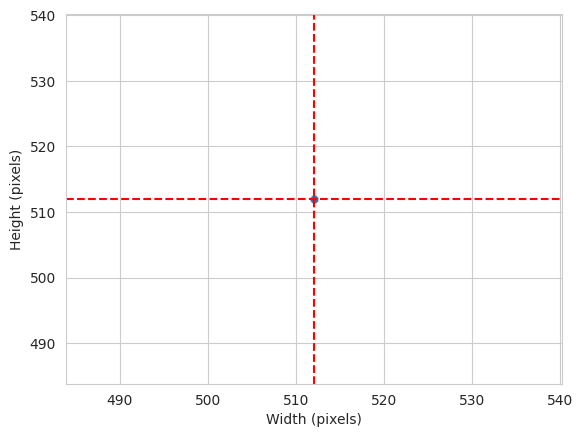

Width average: 512 
Height average: 512


In [7]:
dim1, dim2 = [], []
for label in labels:
    for image_filename in os.listdir(train_path + '/' + label):
        img = imread(train_path + '/' + label + '/' + image_filename)
        d1, d2, colors = img.shape
        dim1.append(d1)  # image height
        dim2.append(d2)  # image width

sns.set_style("whitegrid")
fig, axes = plt.subplots()
sns.scatterplot(x=dim2, y=dim1, alpha=0.2)
axes.set_xlabel("Width (pixels)")
axes.set_ylabel("Height (pixels)")
dim1_mean = int(np.array(dim1).mean())
dim2_mean = int(np.array(dim2).mean())
axes.axvline(x=dim1_mean, color='r', linestyle='--')
axes.axhline(y=dim2_mean, color='r', linestyle='--')
plt.show()
print(f"Width average: {dim2_mean} \nHeight average: {dim1_mean}")

Set standard image shape as originals are too large

In [9]:
image_shape = (128, 128, 3)
print("Image shape set to:", image_shape)

Image shape set to: (128, 128, 3)


Save image shape

In [10]:
joblib.dump(value=image_shape,
    filename=f"{file_path}/image_shape.pkl")

['outputs/v1/image_shape.pkl']

---

## Average and Variability of Images  per Breed
---

### Function to load images in an array (tensor)

In [11]:
from tensorflow.keras.preprocessing import image

def load_image_as_array(my_data_dir, new_size=(128, 128), n_images_per_label=20):
    X, y = np.array([], dtype='int'), np.array([], dtype='object')
    labels = os.listdir(my_data_dir)

    for label in labels:
        counter = 0
        for image_filename in os.listdir(my_data_dir + '/' + label):
            if counter < n_images_per_label:
                img = image.load_img(my_data_dir + '/' + label + '/' + image_filename,
                    target_size=new_size)
                if image.img_to_array(img).max() > 1:
                    img_resized = image.img_to_array(img) / 255
                else:
                    img_resized = image.img_to_array(img)

                X = np.append(X, img_resized).reshape(-1,
                    new_size[0], new_size[1], img_resized.shape[2])
                y = np.append(y, label)
                counter += 1
    return X, y

2025-09-19 12:41:02.695938: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Load image shapes and labels in an array

In [13]:
X, y = load_image_as_array(my_data_dir=train_path,
    new_size=image_shape,
    n_images_per_label=30)
print(X.shape, y.shape)

(1920, 128, 128, 3) (1920,)


Plot and save mean and variability of images per breed

==== Label antelope ====
Image Shape: (128, 128, 3)
==== Label bear ====
Image Shape: (128, 128, 3)
==== Label beaver ====
Image Shape: (128, 128, 3)
==== Label bee ====
Image Shape: (128, 128, 3)
==== Label bison ====
Image Shape: (128, 128, 3)
==== Label blackbird ====
Image Shape: (128, 128, 3)
==== Label buffalo ====
Image Shape: (128, 128, 3)
==== Label butterfly ====
Image Shape: (128, 128, 3)
==== Label camel ====
Image Shape: (128, 128, 3)
==== Label cat ====
Image Shape: (128, 128, 3)
==== Label cheetah ====
Image Shape: (128, 128, 3)
==== Label chimpanzee ====
Image Shape: (128, 128, 3)
==== Label chinchilla ====
Image Shape: (128, 128, 3)
==== Label cow ====
Image Shape: (128, 128, 3)
==== Label crab ====
Image Shape: (128, 128, 3)
==== Label crocodile ====
Image Shape: (128, 128, 3)
==== Label deer ====
Image Shape: (128, 128, 3)
==== Label dog ====
Image Shape: (128, 128, 3)
==== Label dolphin ====
Image Shape: (128, 128, 3)
==== Label donkey ====
Image Shape: (128, 128, 3

/tmp/ipykernel_44548/1818512205.py:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, axes = plt.subplots(nrows=1, ncols=2, figsize=figsize)


==== Label eagle ====
Image Shape: (128, 128, 3)
==== Label elephant ====
Image Shape: (128, 128, 3)
==== Label falcon ====
Image Shape: (128, 128, 3)
==== Label ferret ====
Image Shape: (128, 128, 3)
==== Label flamingo ====
Image Shape: (128, 128, 3)
==== Label fox ====
Image Shape: (128, 128, 3)
==== Label frog ====
Image Shape: (128, 128, 3)
==== Label giraffe ====
Image Shape: (128, 128, 3)
==== Label goat ====
Image Shape: (128, 128, 3)
==== Label goose ====
Image Shape: (128, 128, 3)
==== Label gorilla ====
Image Shape: (128, 128, 3)
==== Label grasshopper ====
Image Shape: (128, 128, 3)
==== Label hawk ====
Image Shape: (128, 128, 3)
==== Label hedgehog ====
Image Shape: (128, 128, 3)
==== Label hippopotamus ====
Image Shape: (128, 128, 3)
==== Label hyena ====
Image Shape: (128, 128, 3)
==== Label iguana ====
Image Shape: (128, 128, 3)
==== Label jaguar ====
Image Shape: (128, 128, 3)
==== Label kangaroo ====
Image Shape: (128, 128, 3)
==== Label koala ====
Image Shape: (128, 

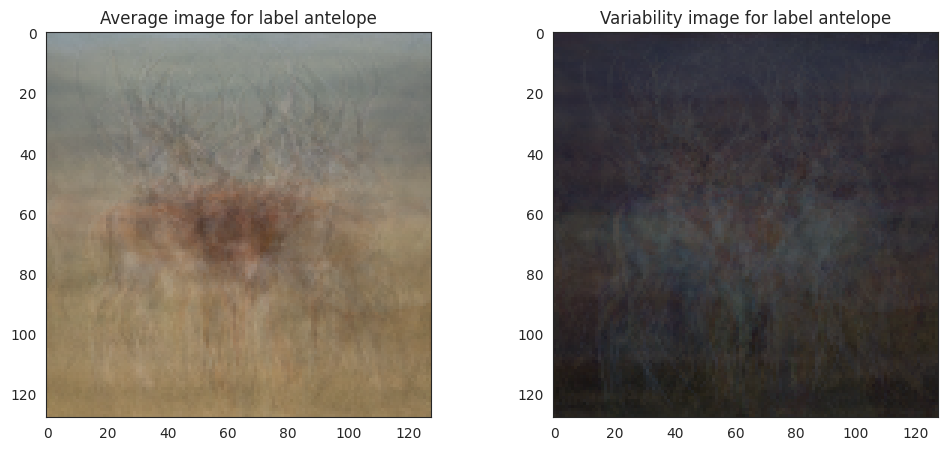

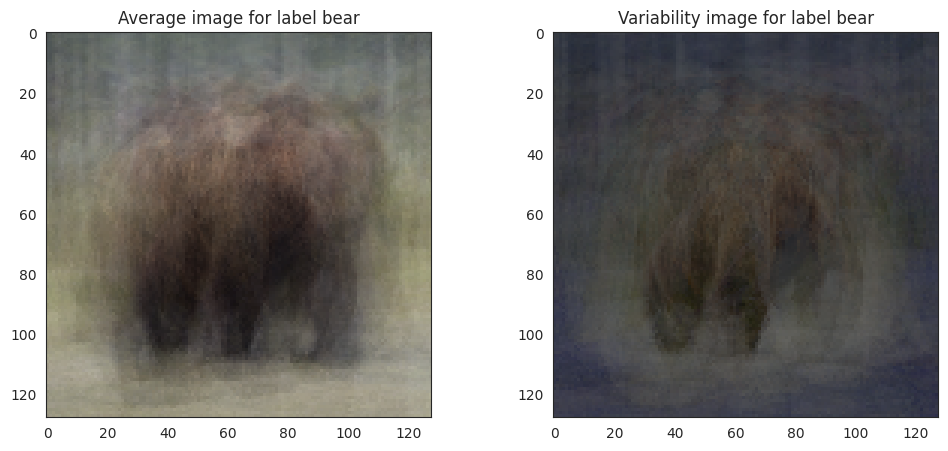

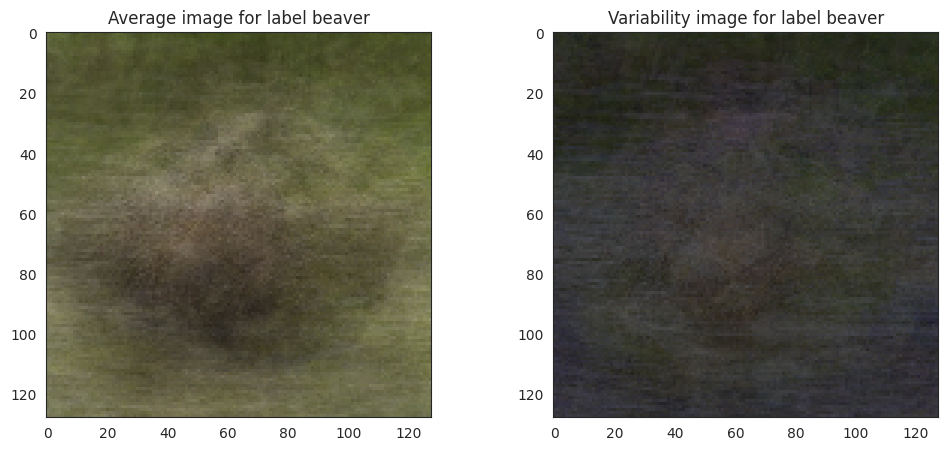

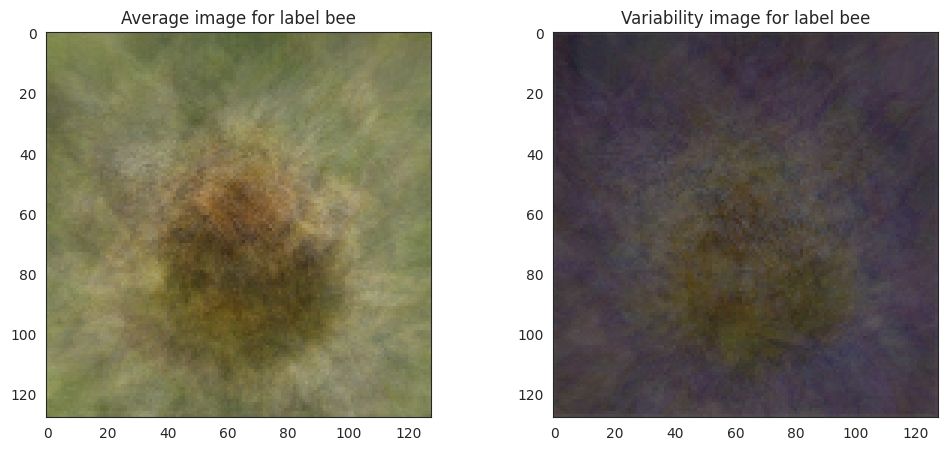

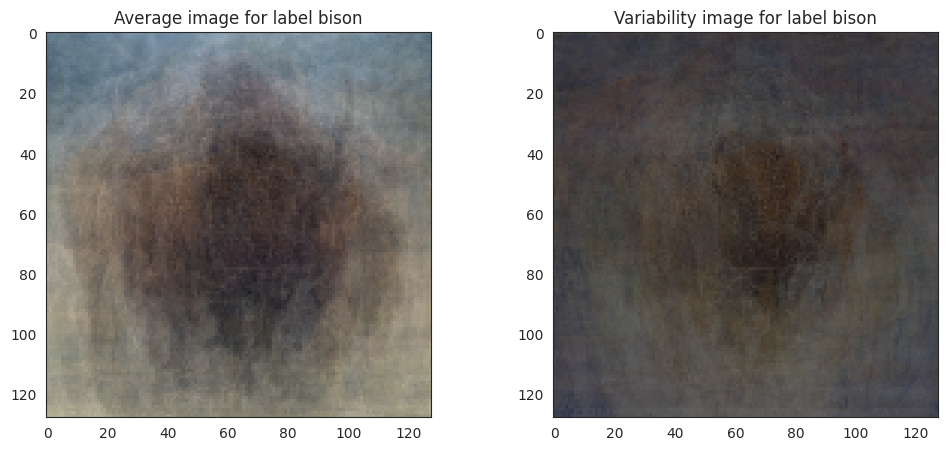

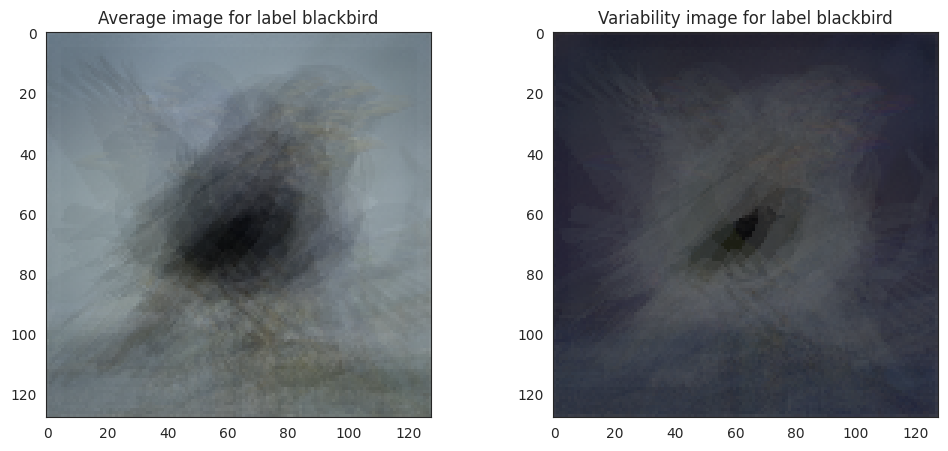

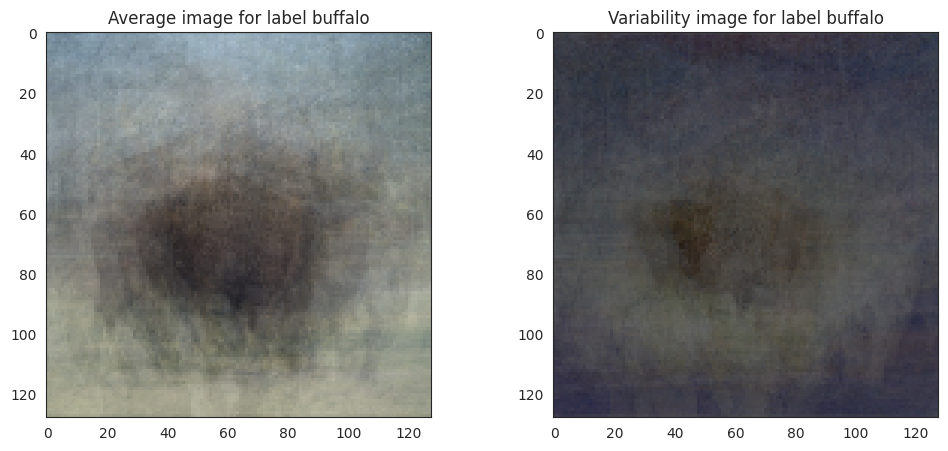

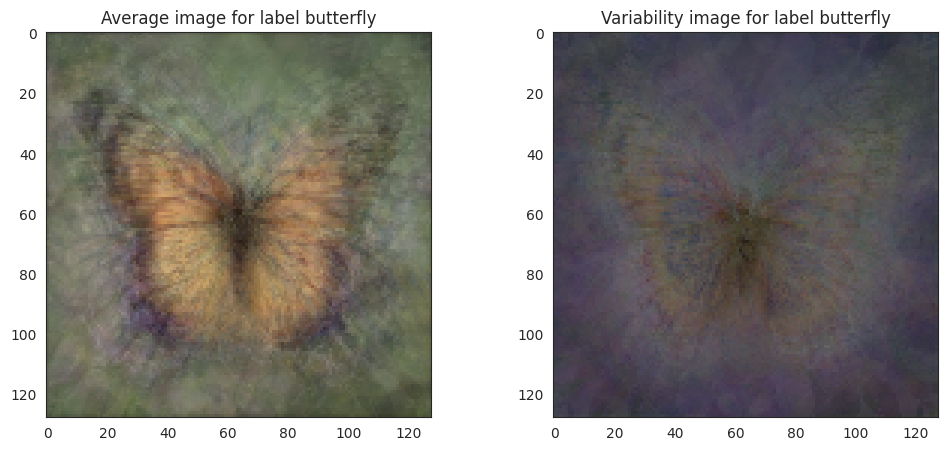

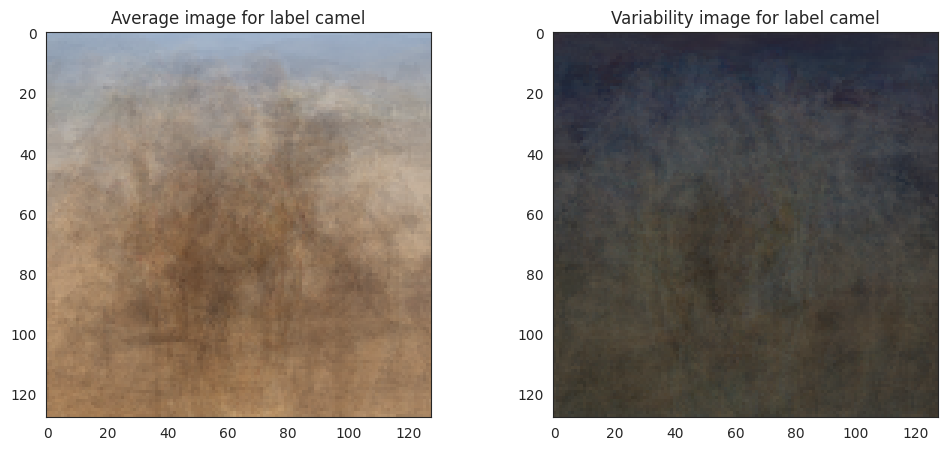

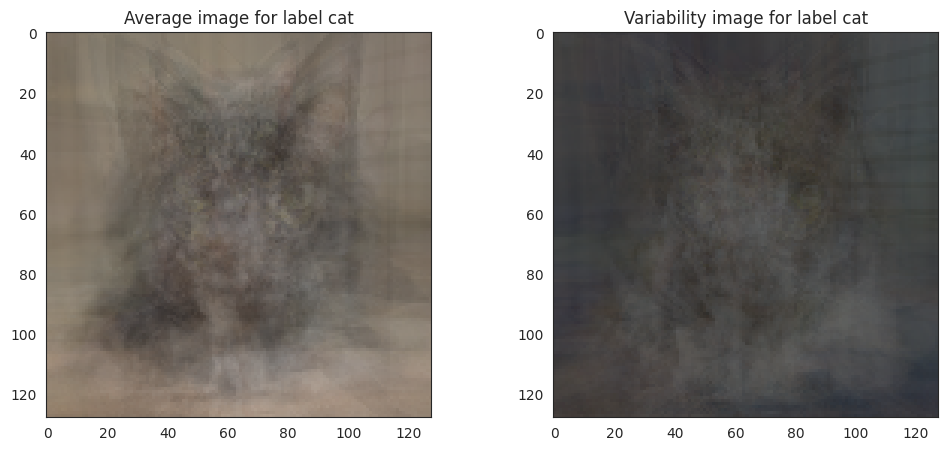

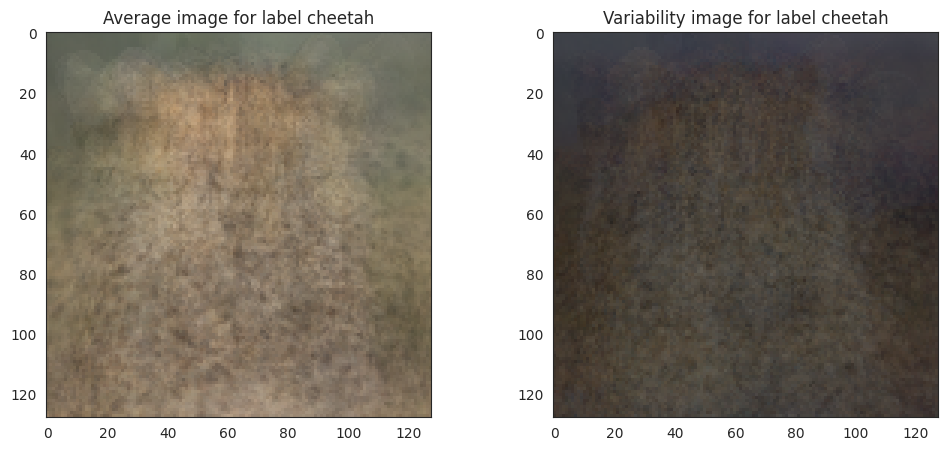

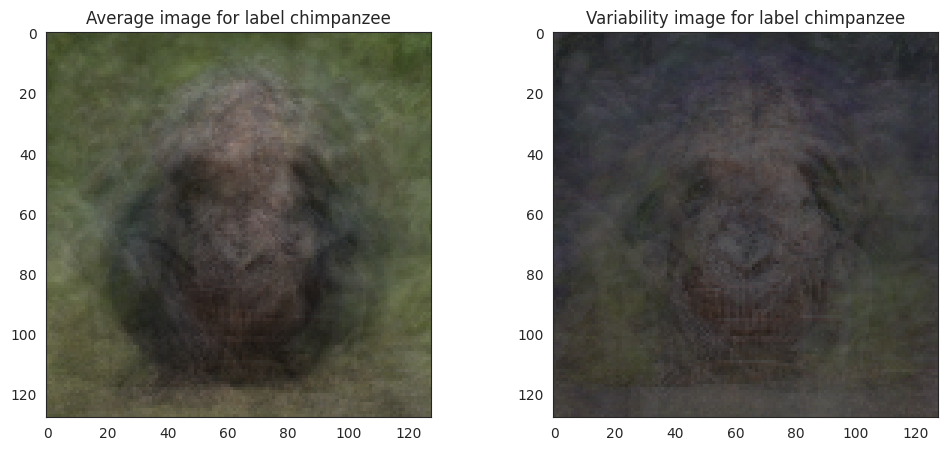

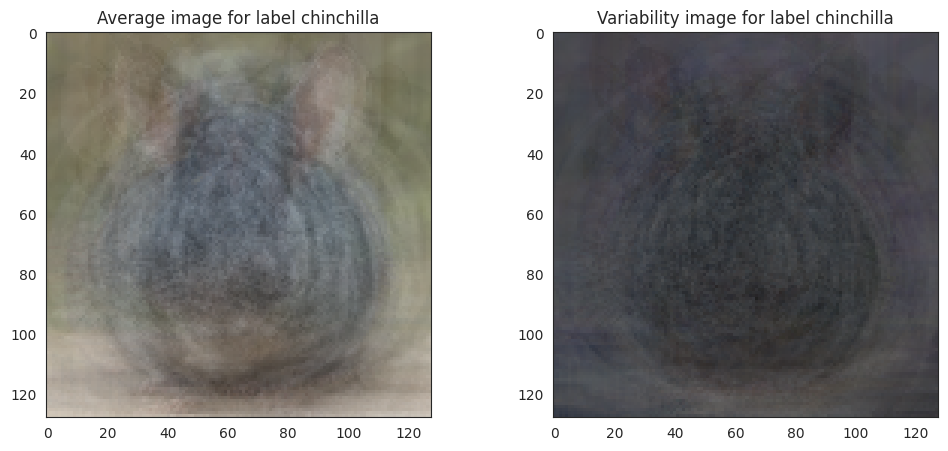

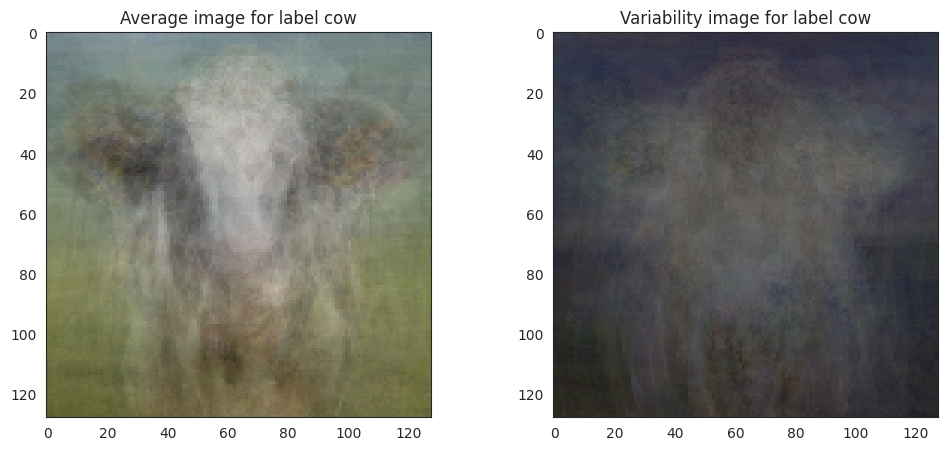

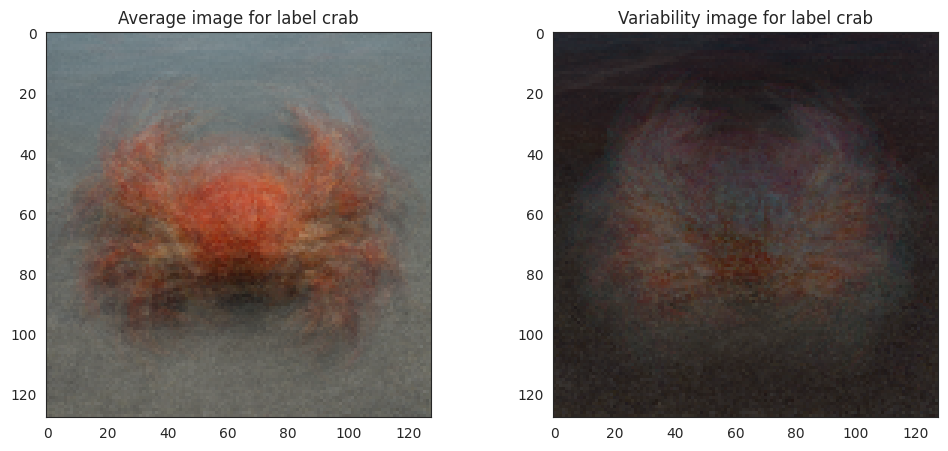

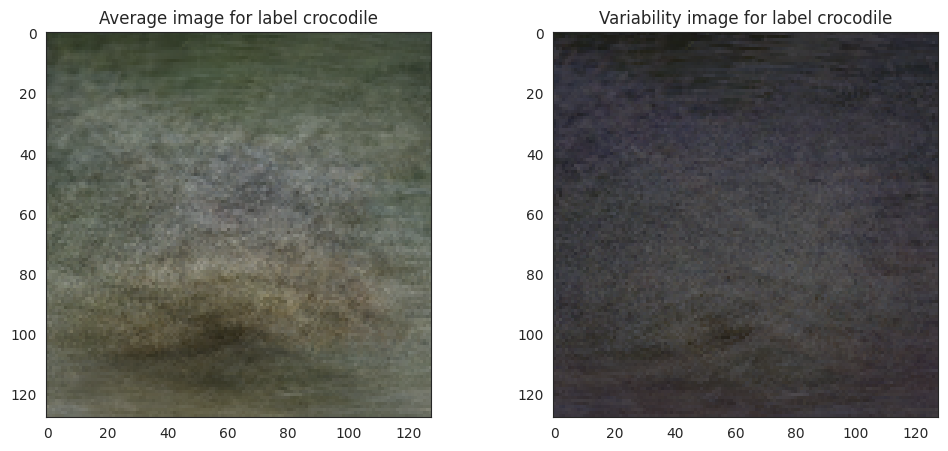

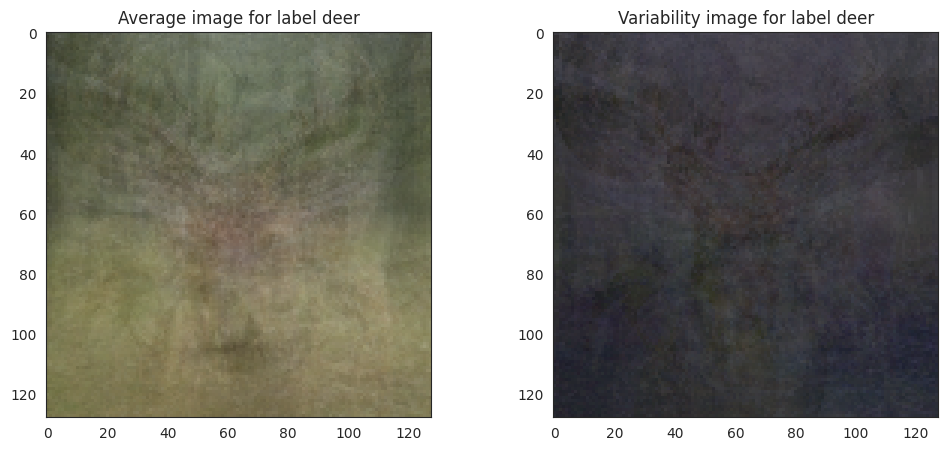

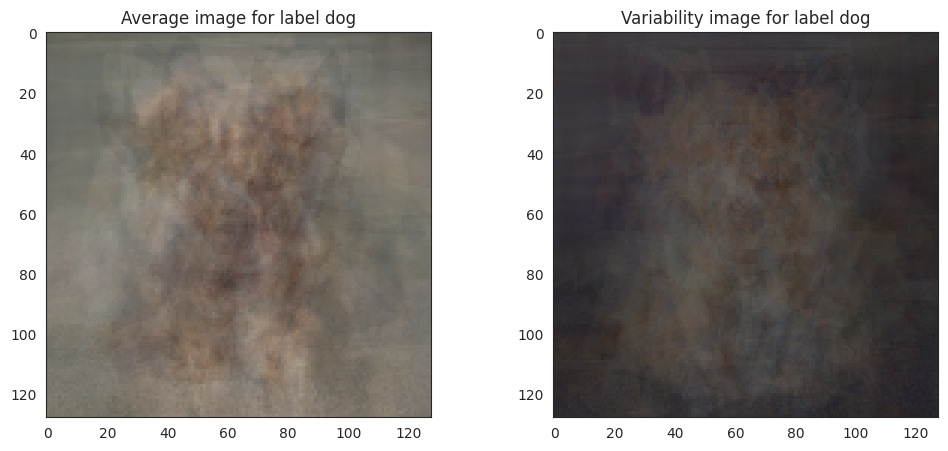

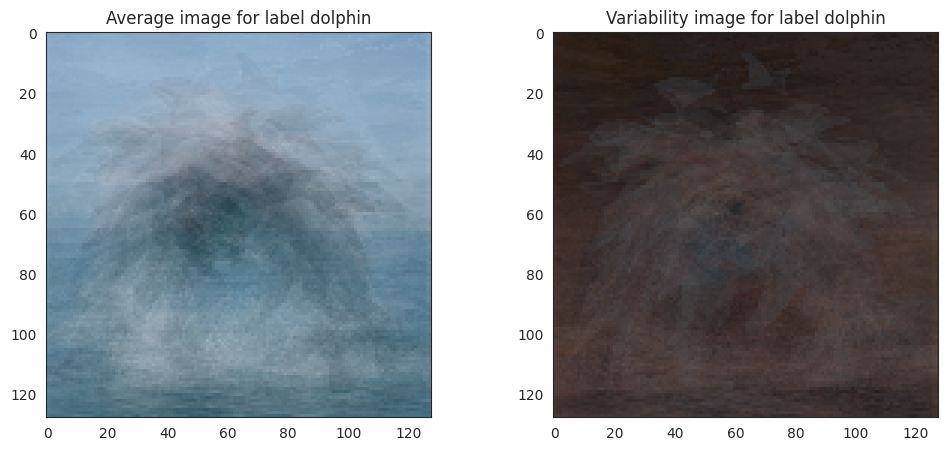

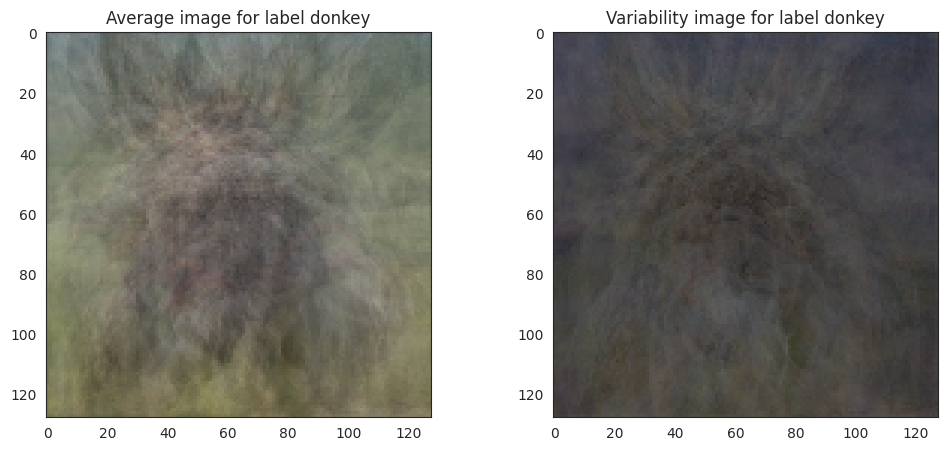

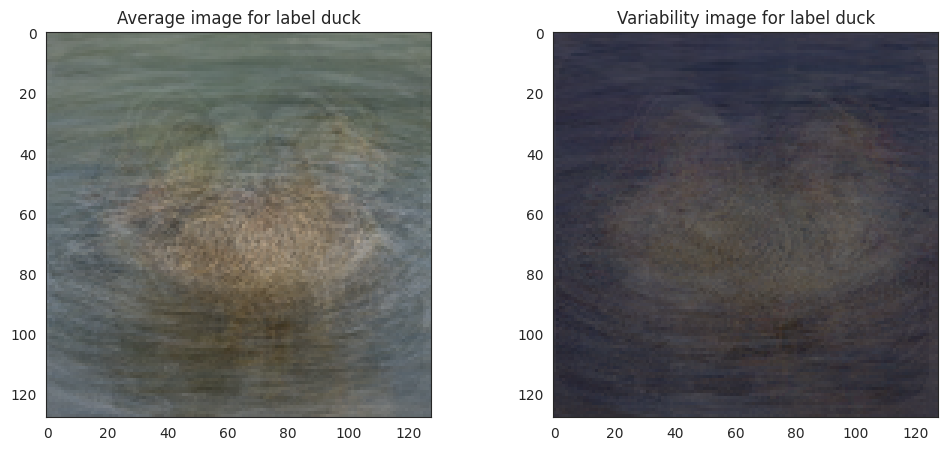

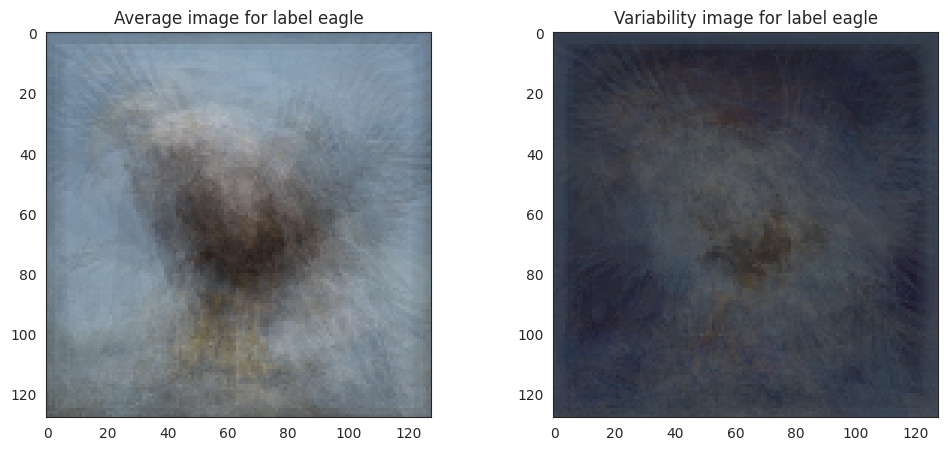

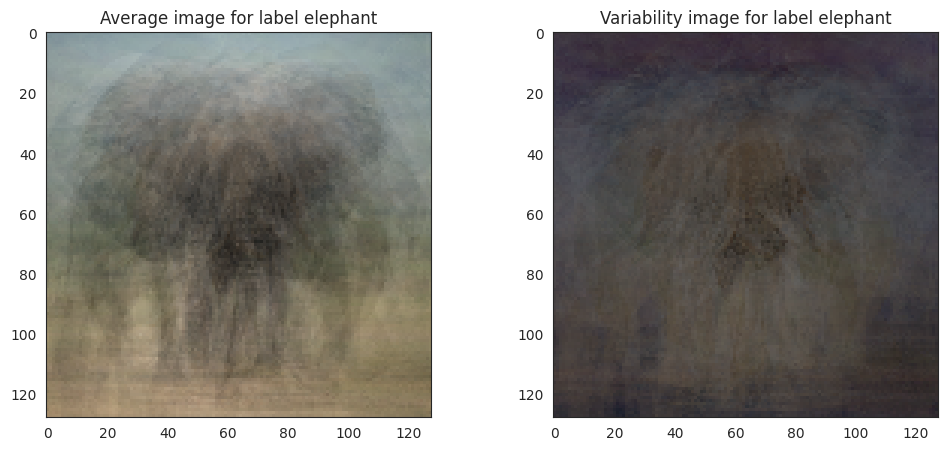

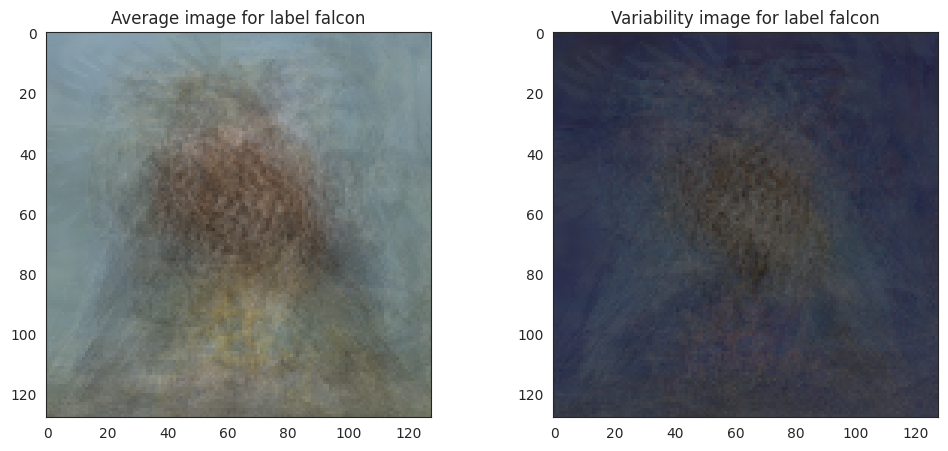

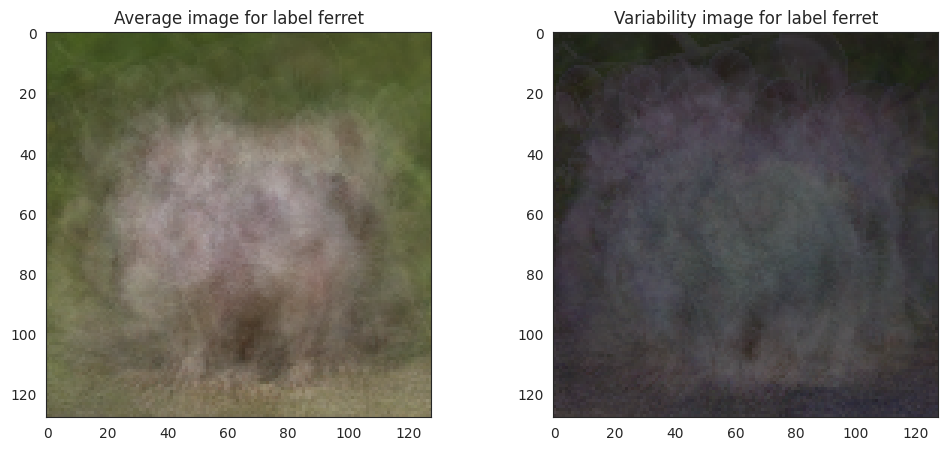

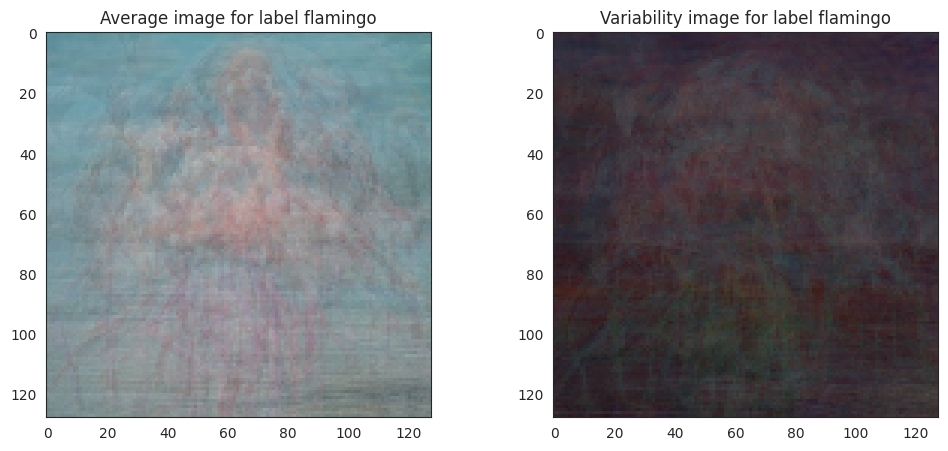

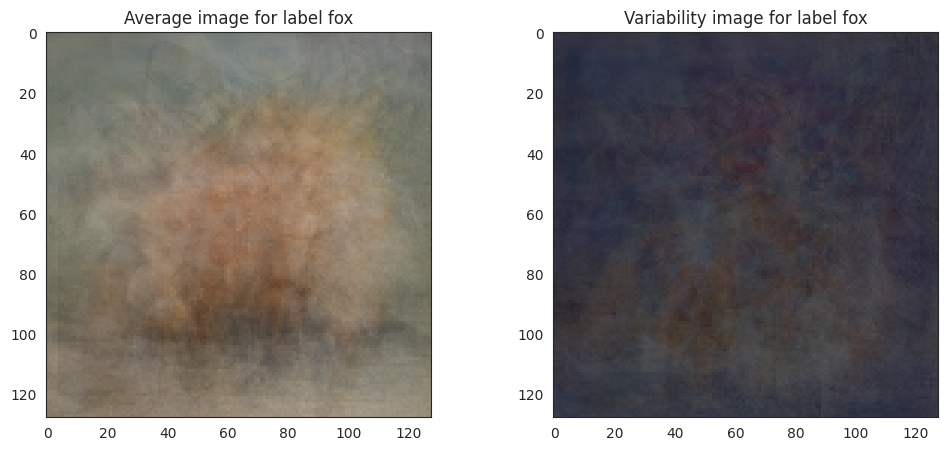

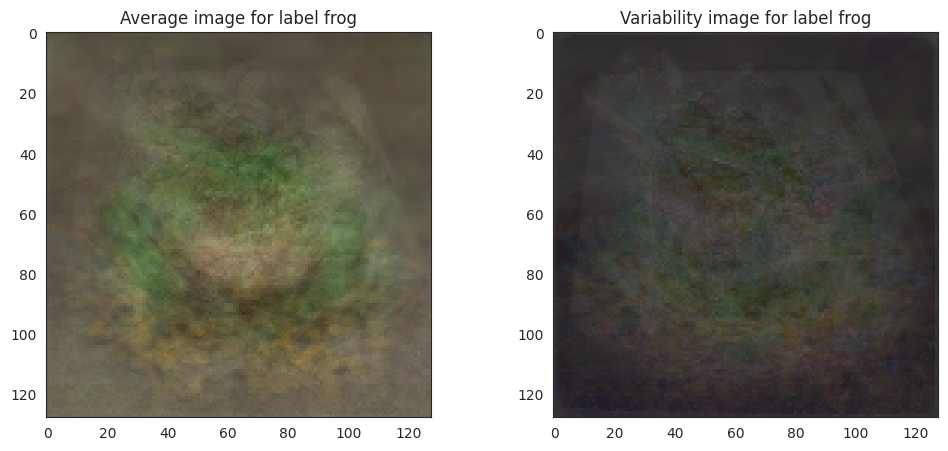

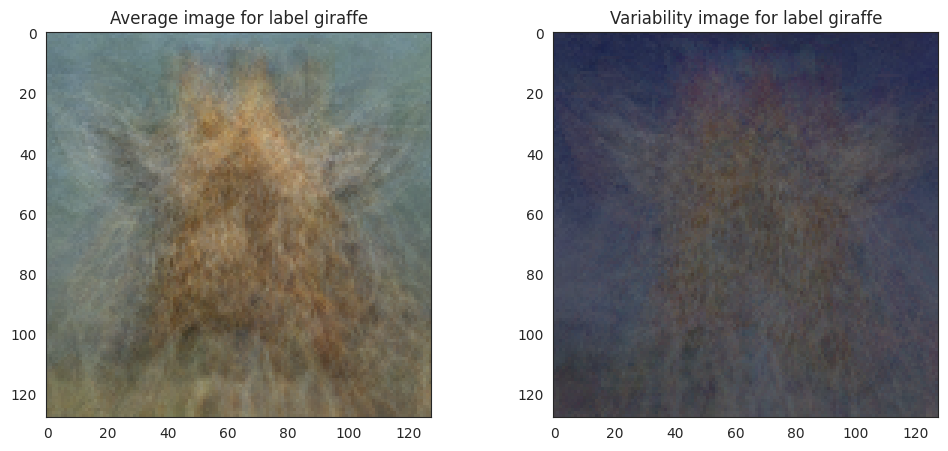

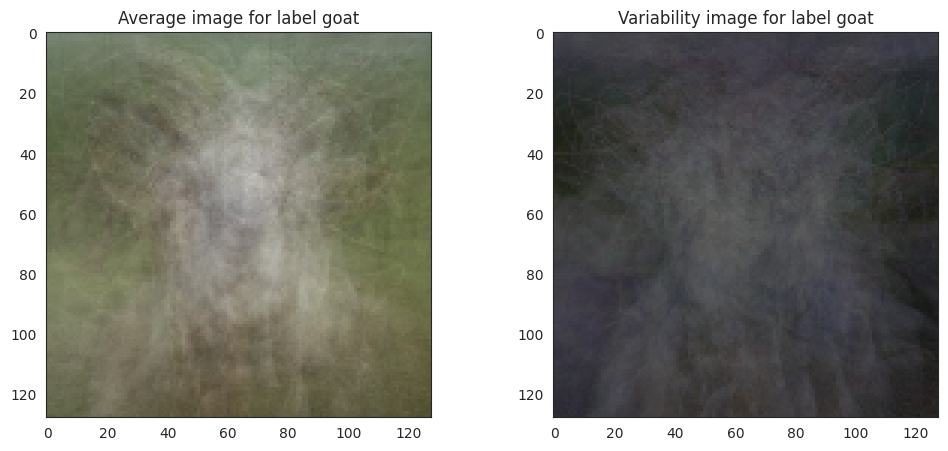

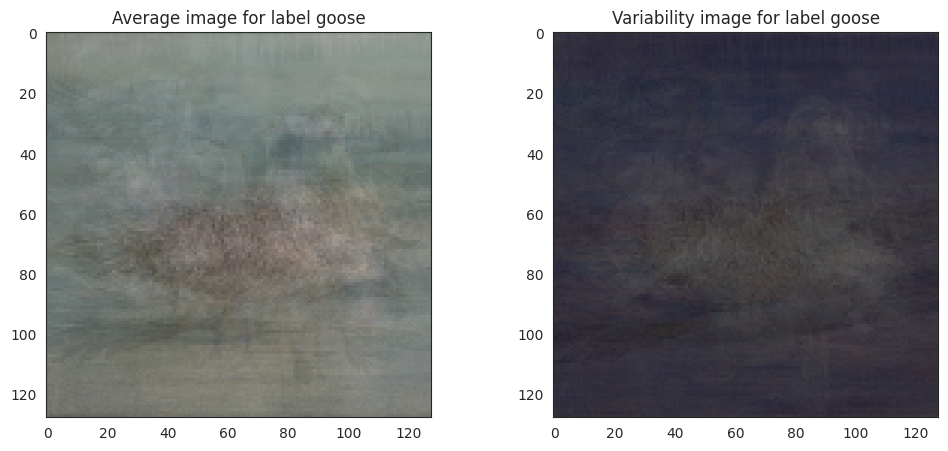

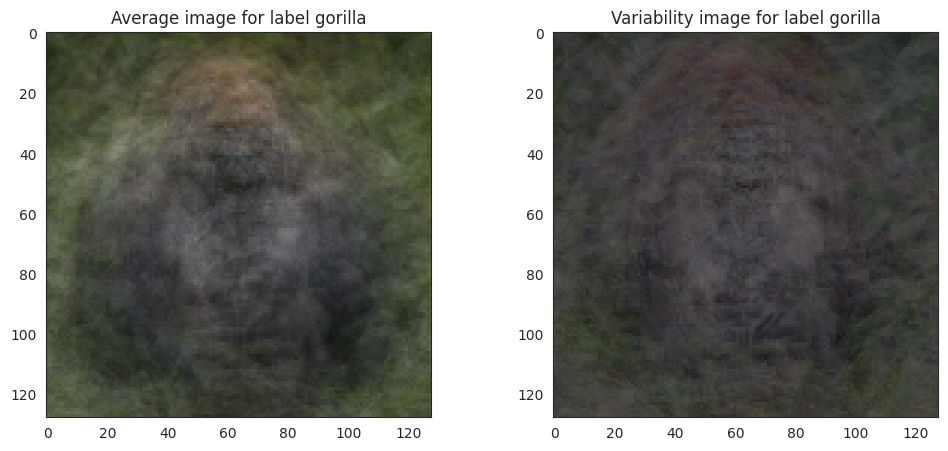

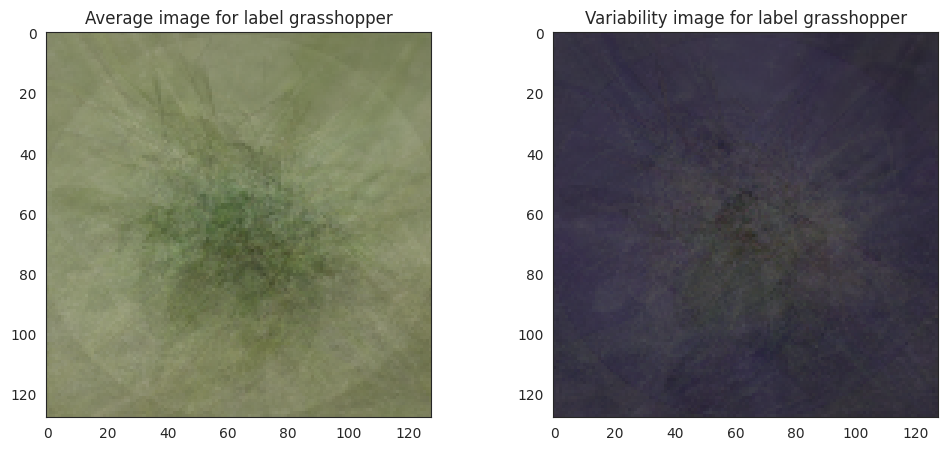

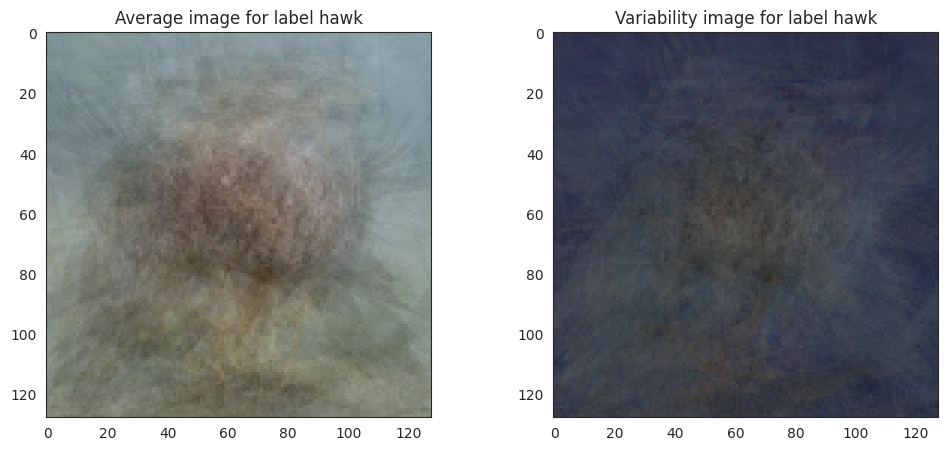

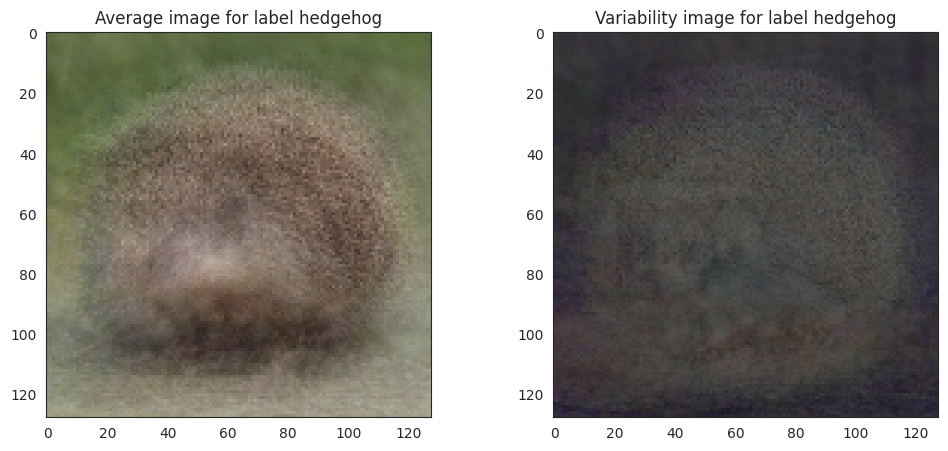

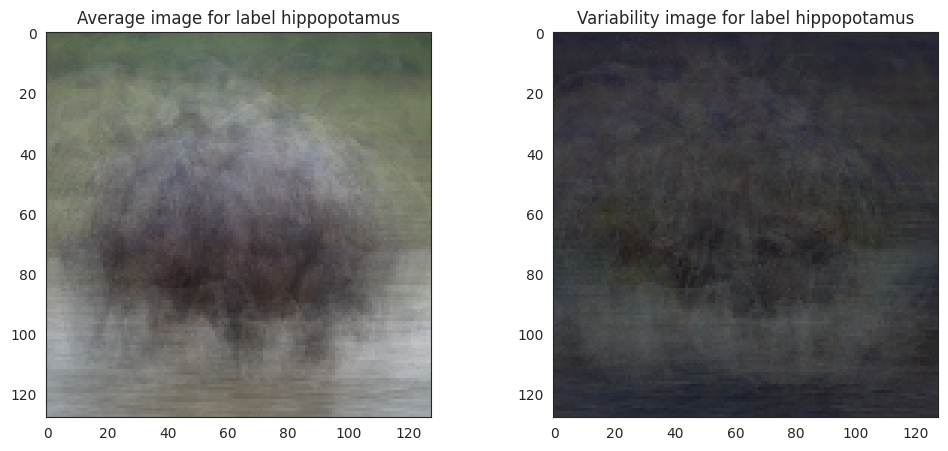

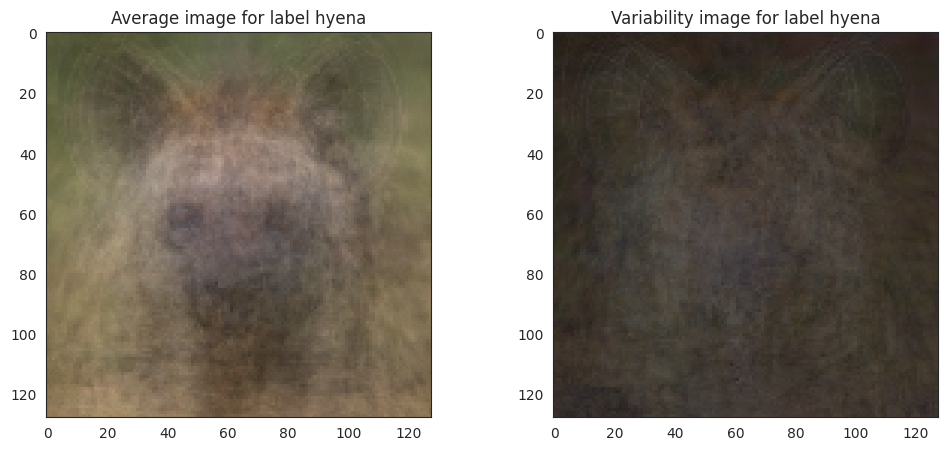

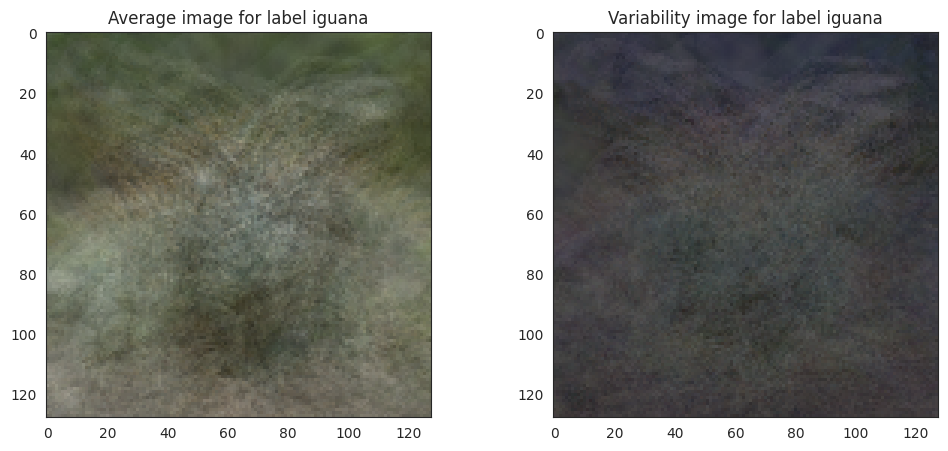

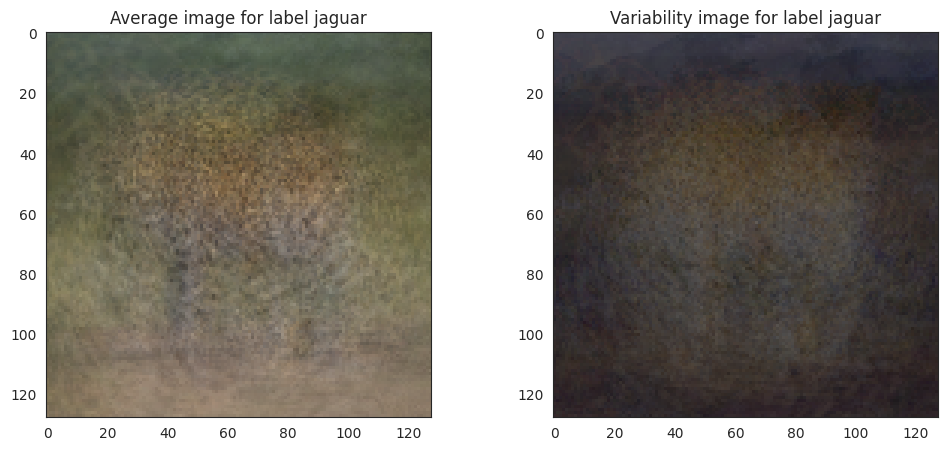

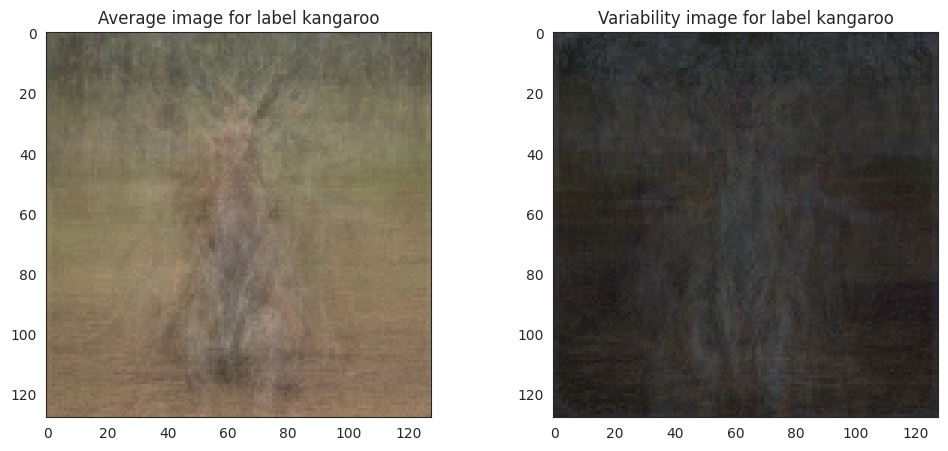

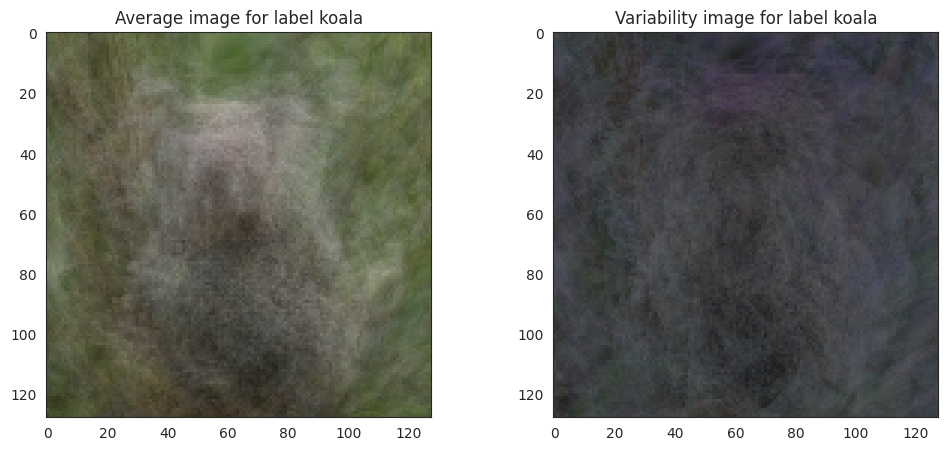

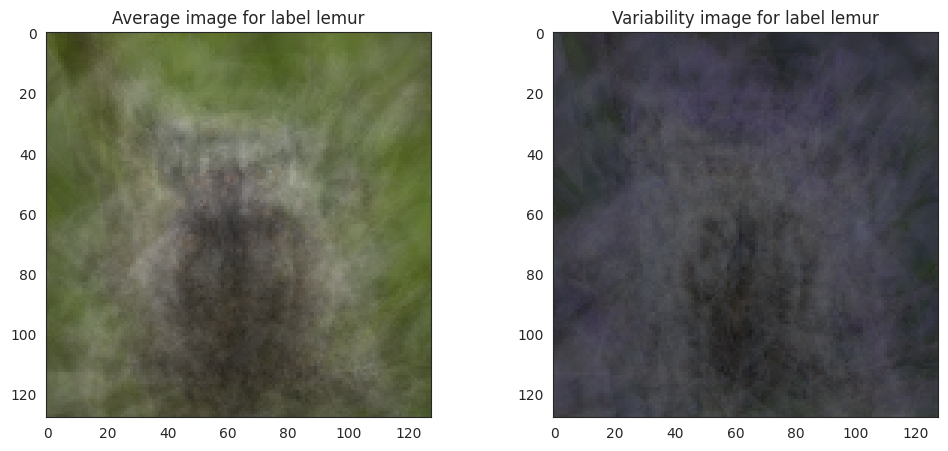

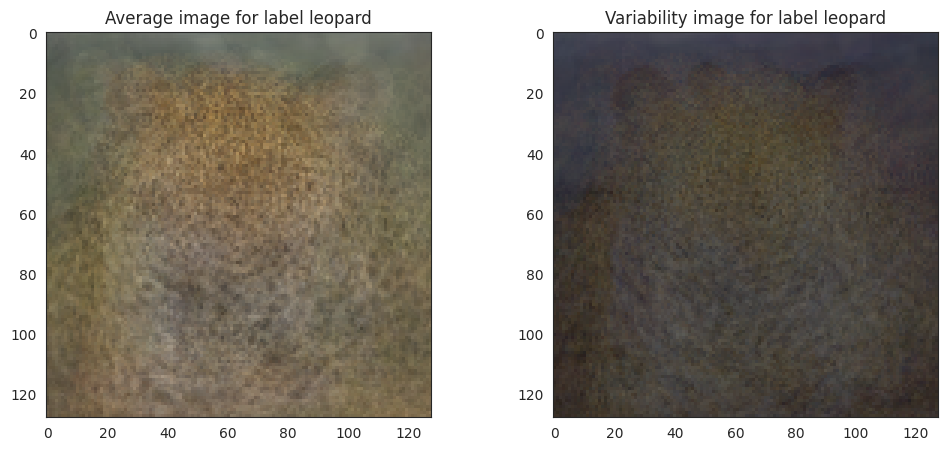

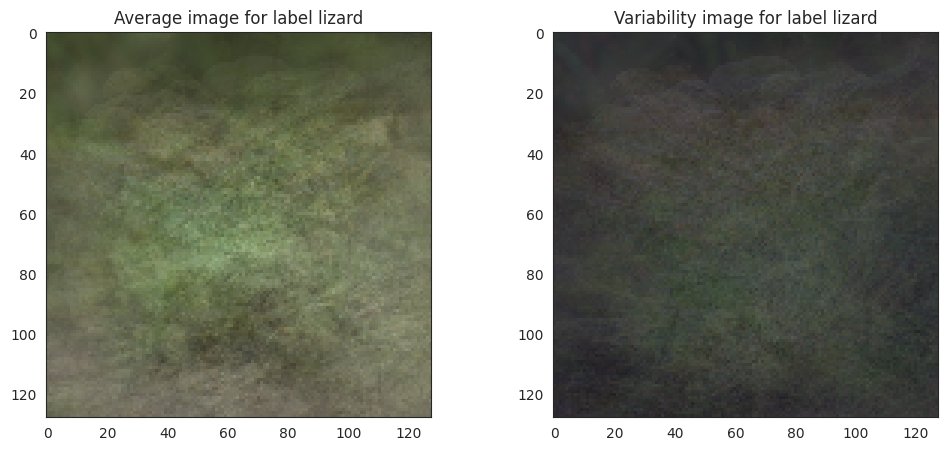

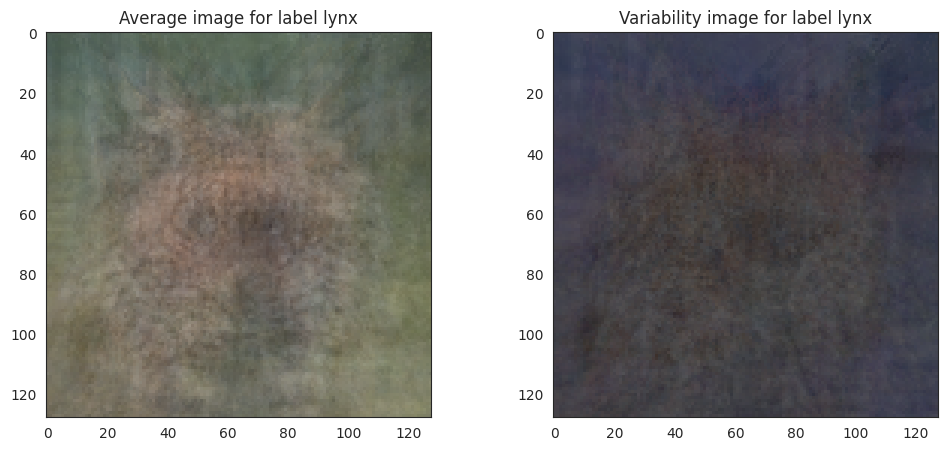

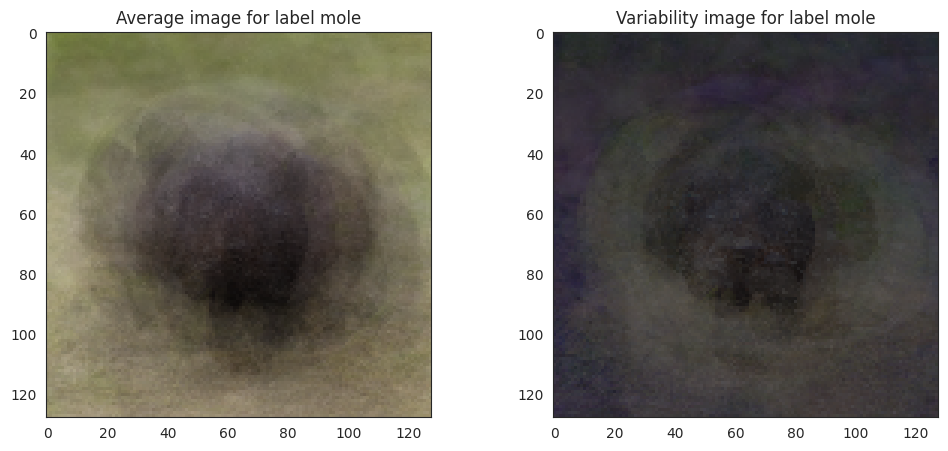

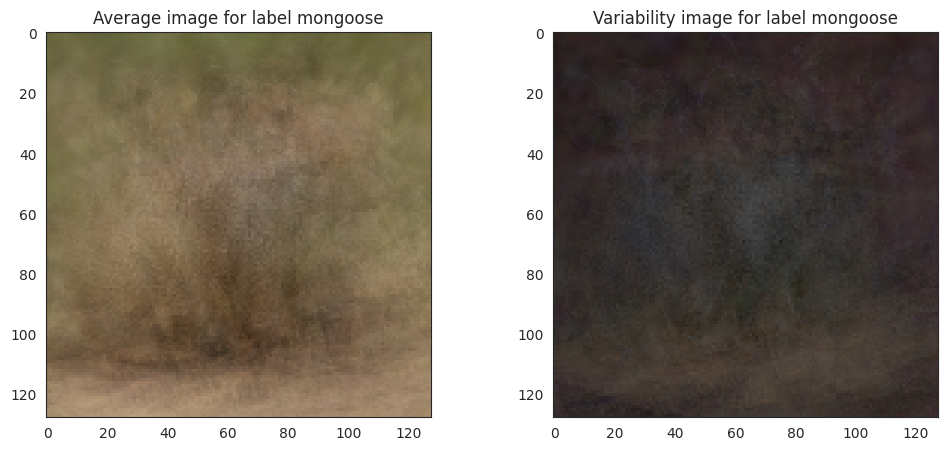

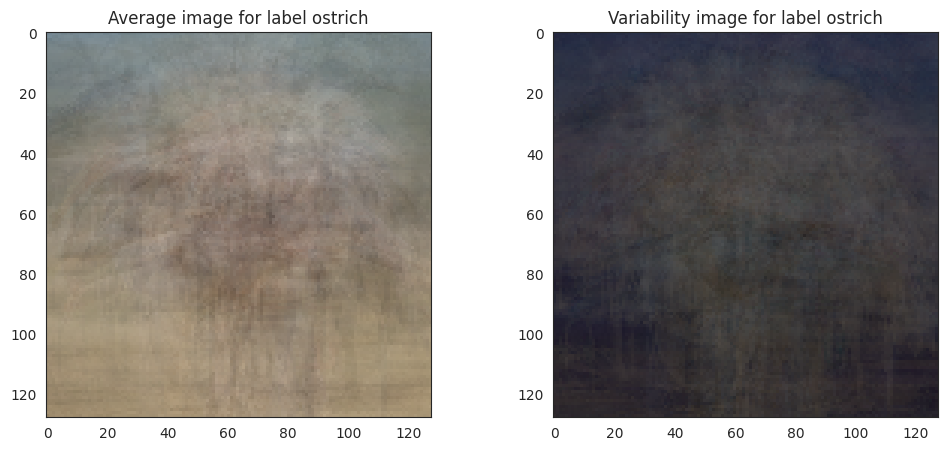

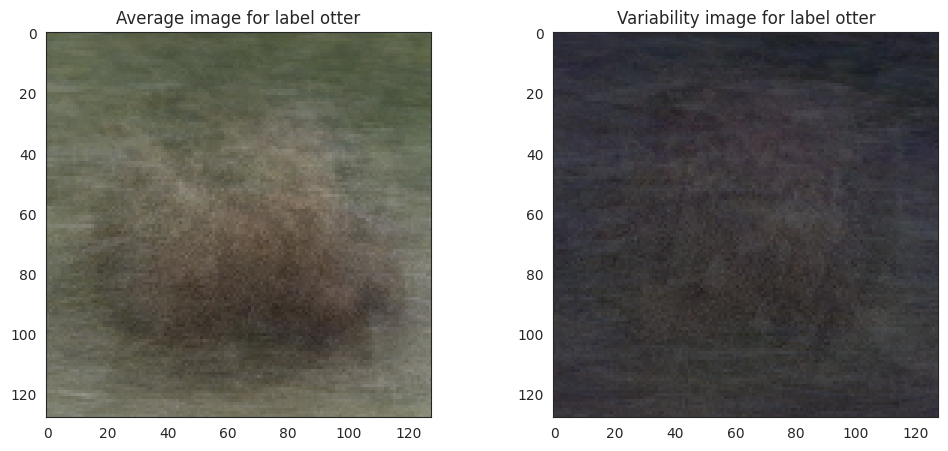

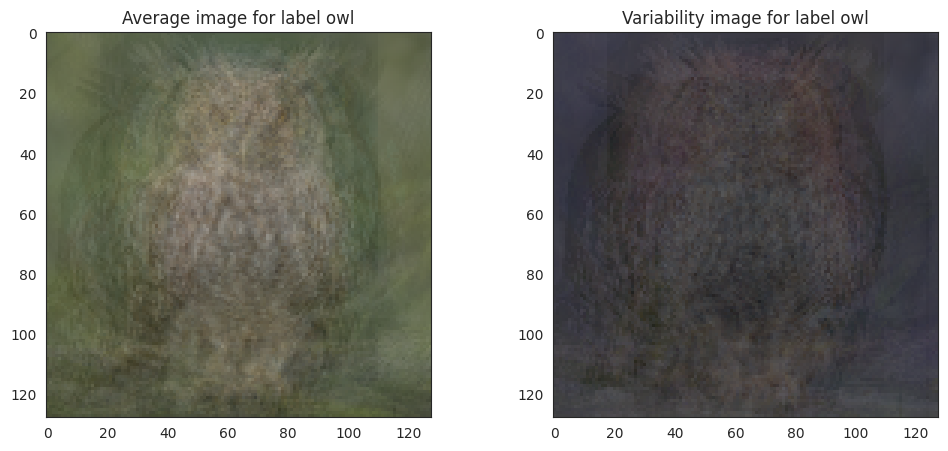

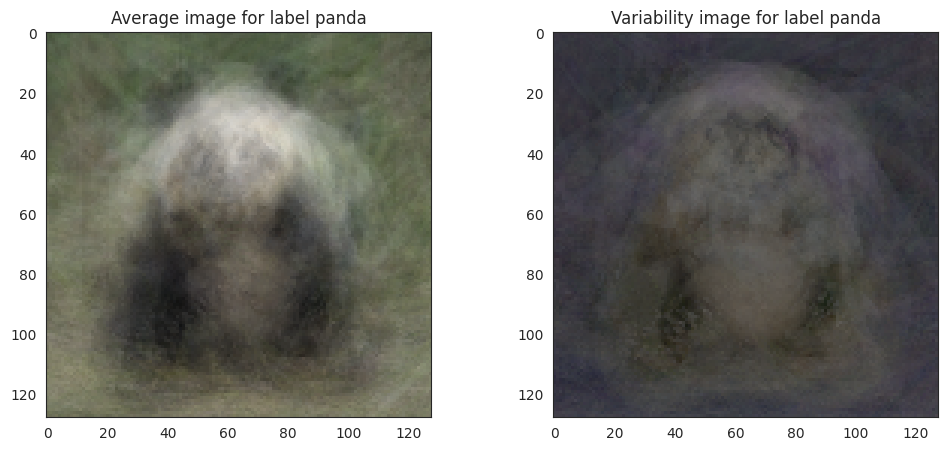

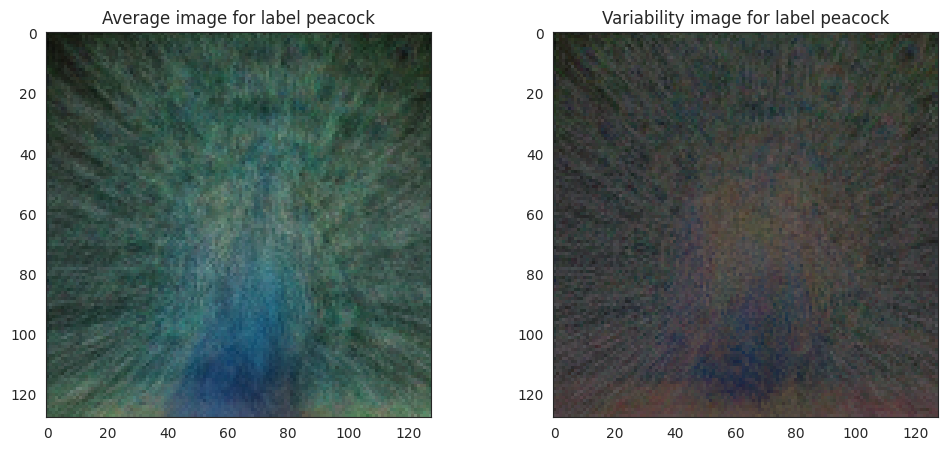

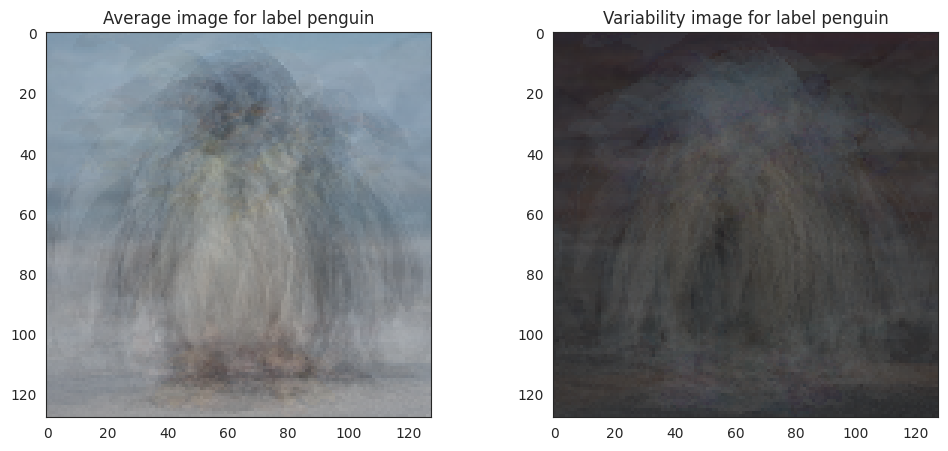

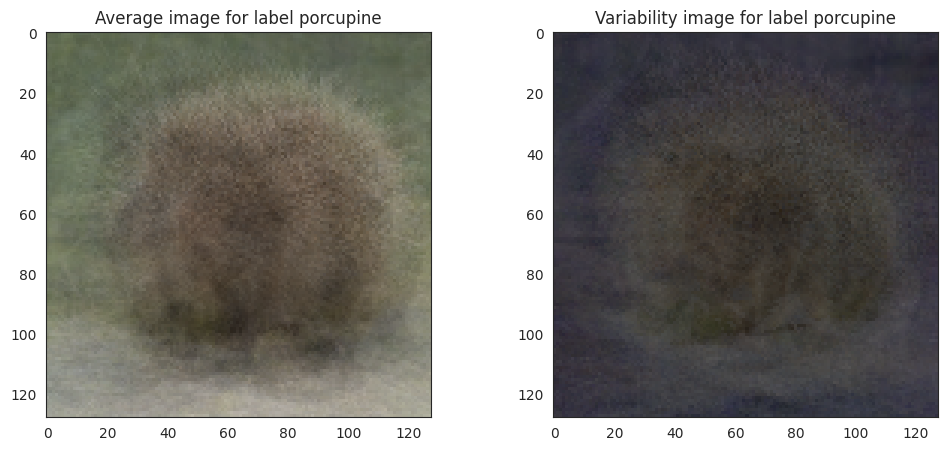

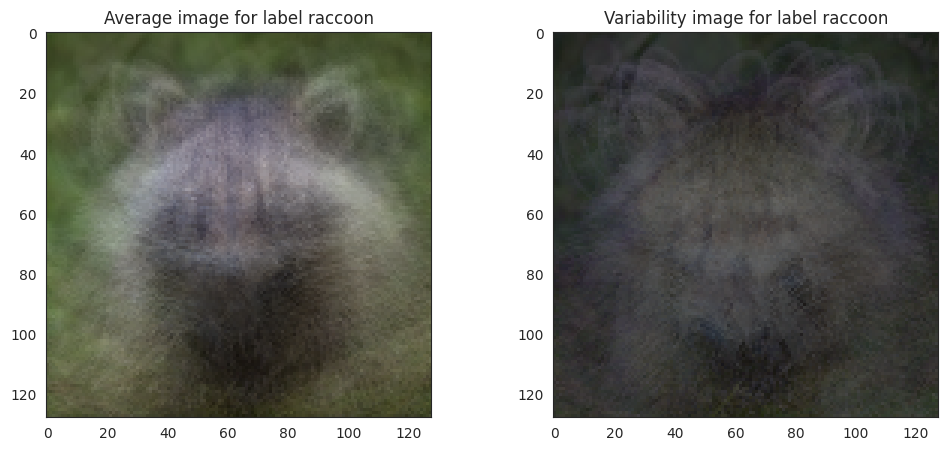

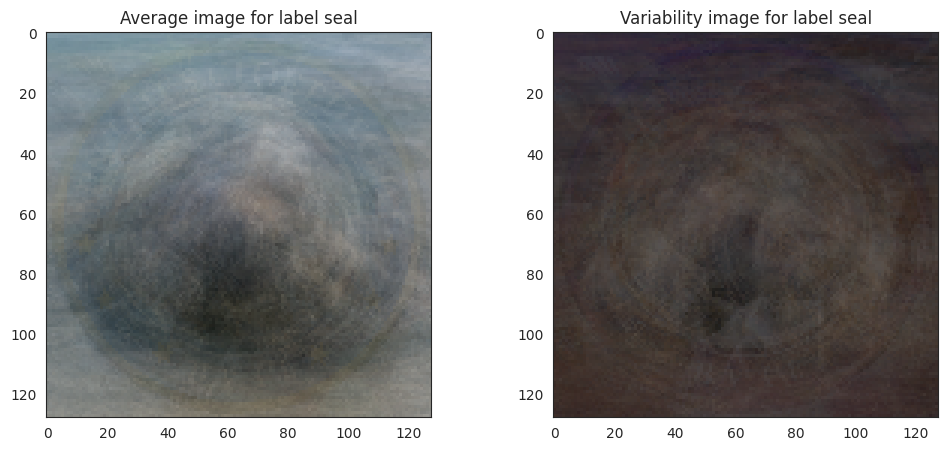

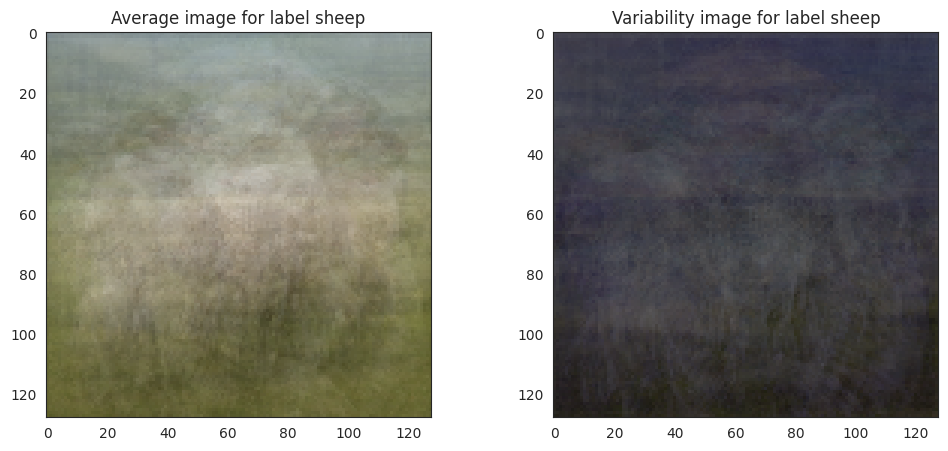

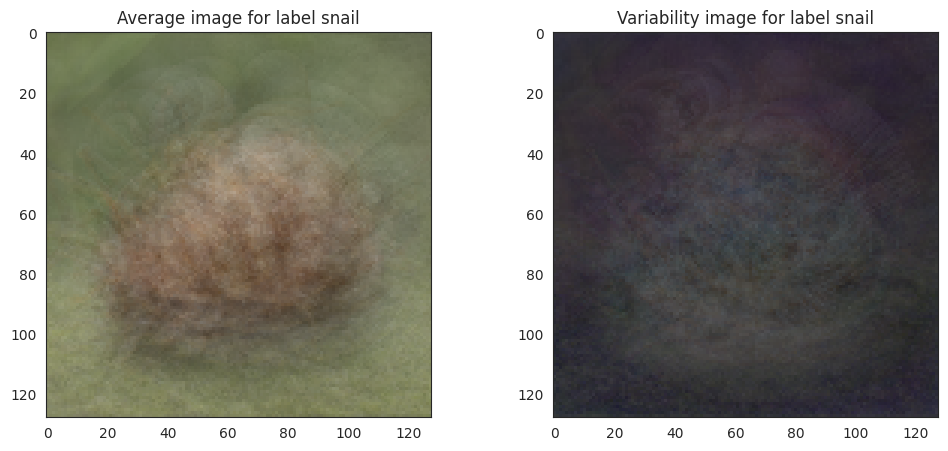

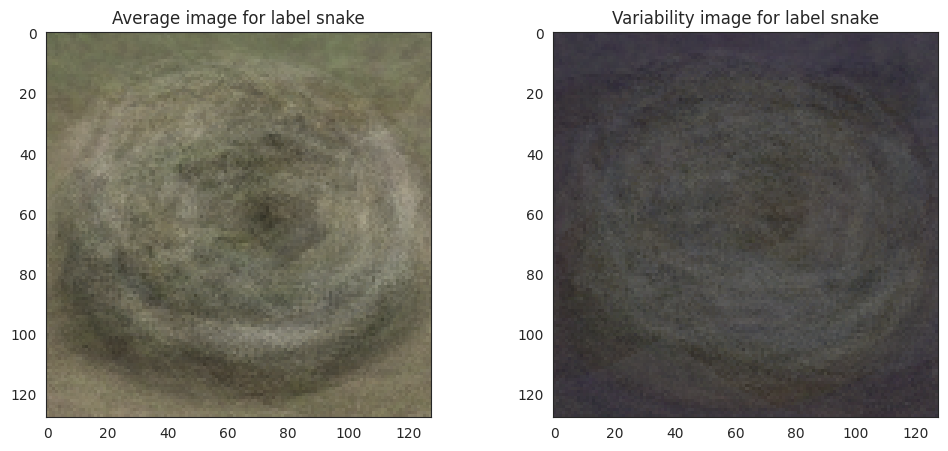

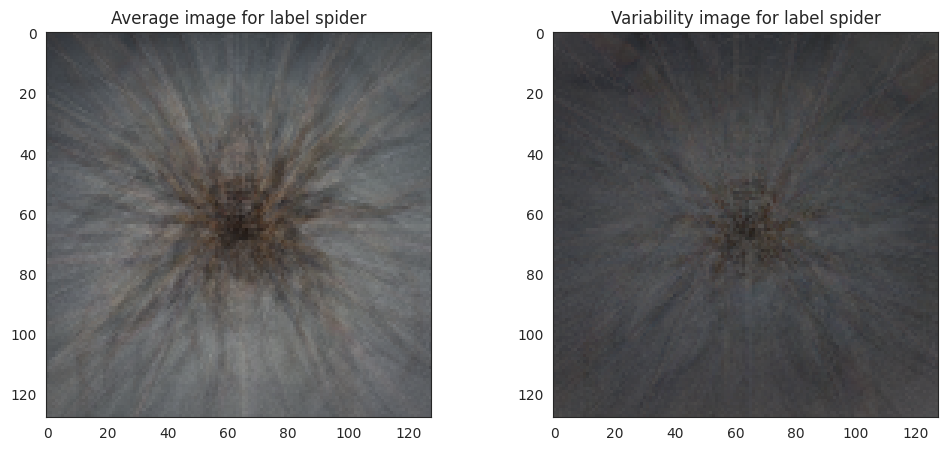

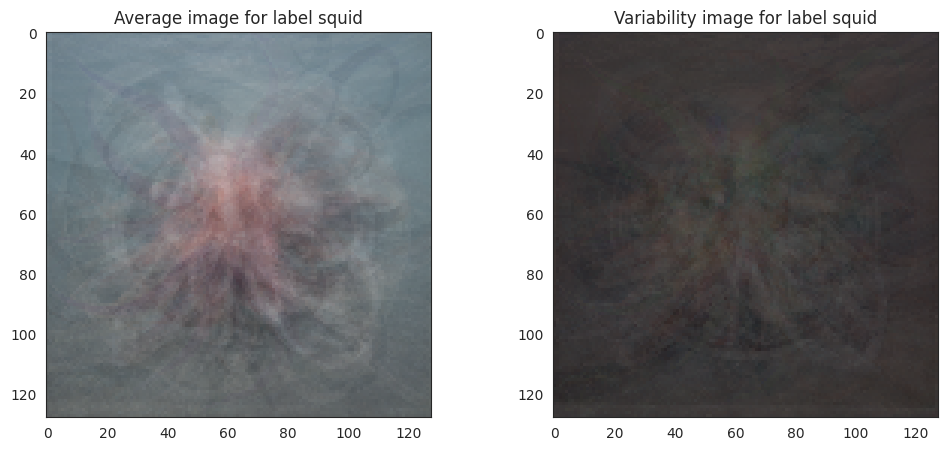

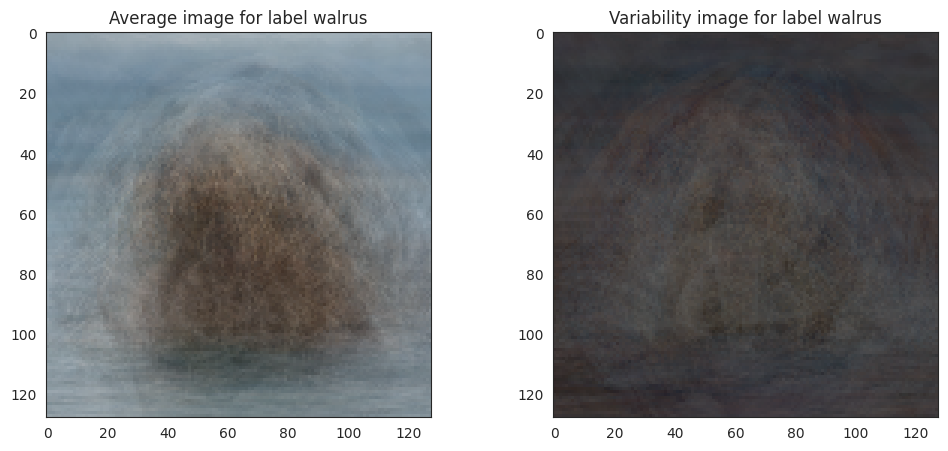

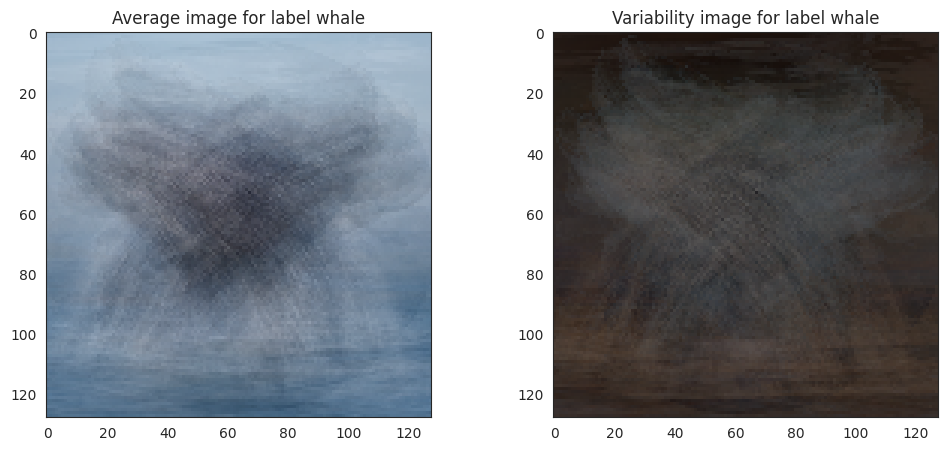

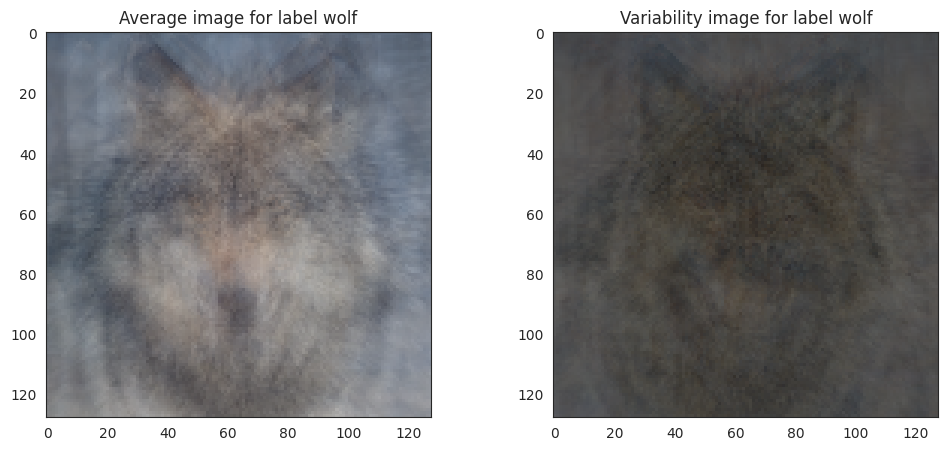

In [14]:
def plot_mean_variability_per_labels(X, y, figsize=(12, 5), save_image=False):
    for label_to_display in np.unique(y):
        sns.set_style("white")
        y = y.reshape(-1, 1, 1)
        boolean_mask = np.any(y == label_to_display, axis=1).reshape(-1)
        arr = X[boolean_mask]

        avg_img = np.mean(arr, axis=0)
        std_img = np.std(arr, axis=0)

        print(f"==== Label {label_to_display} ====")
        print(f"Image Shape: {avg_img.shape}")

        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=figsize)
        axes[0].set_title(f"Average image for label {label_to_display}")
        axes[0].imshow(avg_img, cmap='gray')
        axes[1].set_title(f"Variability image for label {label_to_display}")
        axes[1].imshow(std_img, cmap='gray')

        if save_image:
            plt.savefig(f"{file_path}/avg_var_{label_to_display}.png",
                        bbox_inches='tight', dpi=150)
        else:
            plt.tight_layout()
            plt.show()
            print("\n")

plot_mean_variability_per_labels(X=X, y=y, figsize=(12, 5), save_image=True)